<a href="https://colab.research.google.com/github/pedrohortencio/covid-brasil/blob/main/Plot_SUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

url_script = 'https://raw.githubusercontent.com/pedrohortencio/covid-brasil/main/tratamento_dados_sus.py'
_, _ = urllib.request.urlretrieve(url_script, filename="/content/tratamento_dados_sus.py")
import tratamento_dados_sus as script_sus

sns.set_theme()

In [ ]:
df_2019 = script_sus.criar_df_anual(2019)
df_2020 = script_sus.criar_df_anual(2020)

In [ ]:
df_2020.head()

Lista Morb  CID-10  ...  Taxa_mortalidade
01 Algumas Doenças Infecciosas E Parasitárias 0                 Total do Grupo  ...             16.99
                                              1                         Cólera  ...              3.95
                                              2   Febres tifóide e paratifóide  ...              2.11
                                              3                     Shiguelose  ...               0.0
                                              4                       Amebíase  ...              2.11

[5 rows x 12 columns]

In [ ]:
df_2019.head()

Lista Morb  CID-10  ...  Taxa_mortalidade
01 Algumas Doenças Infecciosas E Parasitárias 0                 Total do Grupo  ...              12.3
                                              1                         Cólera  ...              3.96
                                              2   Febres tifóide e paratifóide  ...              1.39
                                              3                     Shiguelose  ...               0.0
                                              4                       Amebíase  ...              2.83

[5 rows x 12 columns]

In [ ]:
df_2019.loc["01 Algumas Doenças Infecciosas E Parasitárias"].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values

array(['Total do Grupo', ' Outras doenças bacterianas',
       ' Restante de outras doenças bacterianas', ' Septicemia',
       ' Diarréia e gastroenterite origem infecc presum'], dtype=object)

In [ ]:
df_2019[df_2019.loc[:]["Lista Morb  CID-10"] == 'Total do Grupo']['Internações'].values

array([ 758673.,  397100.,  100148.,  211520.,  206725.,  149105.,
         17860.,   11837.,  959907., 1066425.,  715724.,  194468.,
        104631.,  589512., 2380561.,  298212.,   32951.,  183829.,
        989746.,  131372.])

In [145]:
grupos_cid = list(df_2019.index.get_level_values(0).unique()[:-1])

In [151]:
df_2020.loc["01 Algumas Doenças Infecciosas E Parasitárias"]["Lista Morb  CID-10"].isin(df_2019.loc[grupos_cid[0]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values)

0      True
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
81    False
Name: Lista Morb  CID-10, Length: 82, dtype: bool

In [ ]:
df_2020.loc[grupos_cid[0]][df_2020.loc[grupos_cid[0]]["Lista Morb  CID-10"].isin(df_2019.loc[grupos_cid[0]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values)]

In [159]:
df_2020.loc[grupos_cid[index]][df_2020.loc[grupos_cid[index]]["Lista Morb  CID-10"].isin(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values)]['Internações'].values

array([978009.,  92585., 356169.,  87683., 140011.])

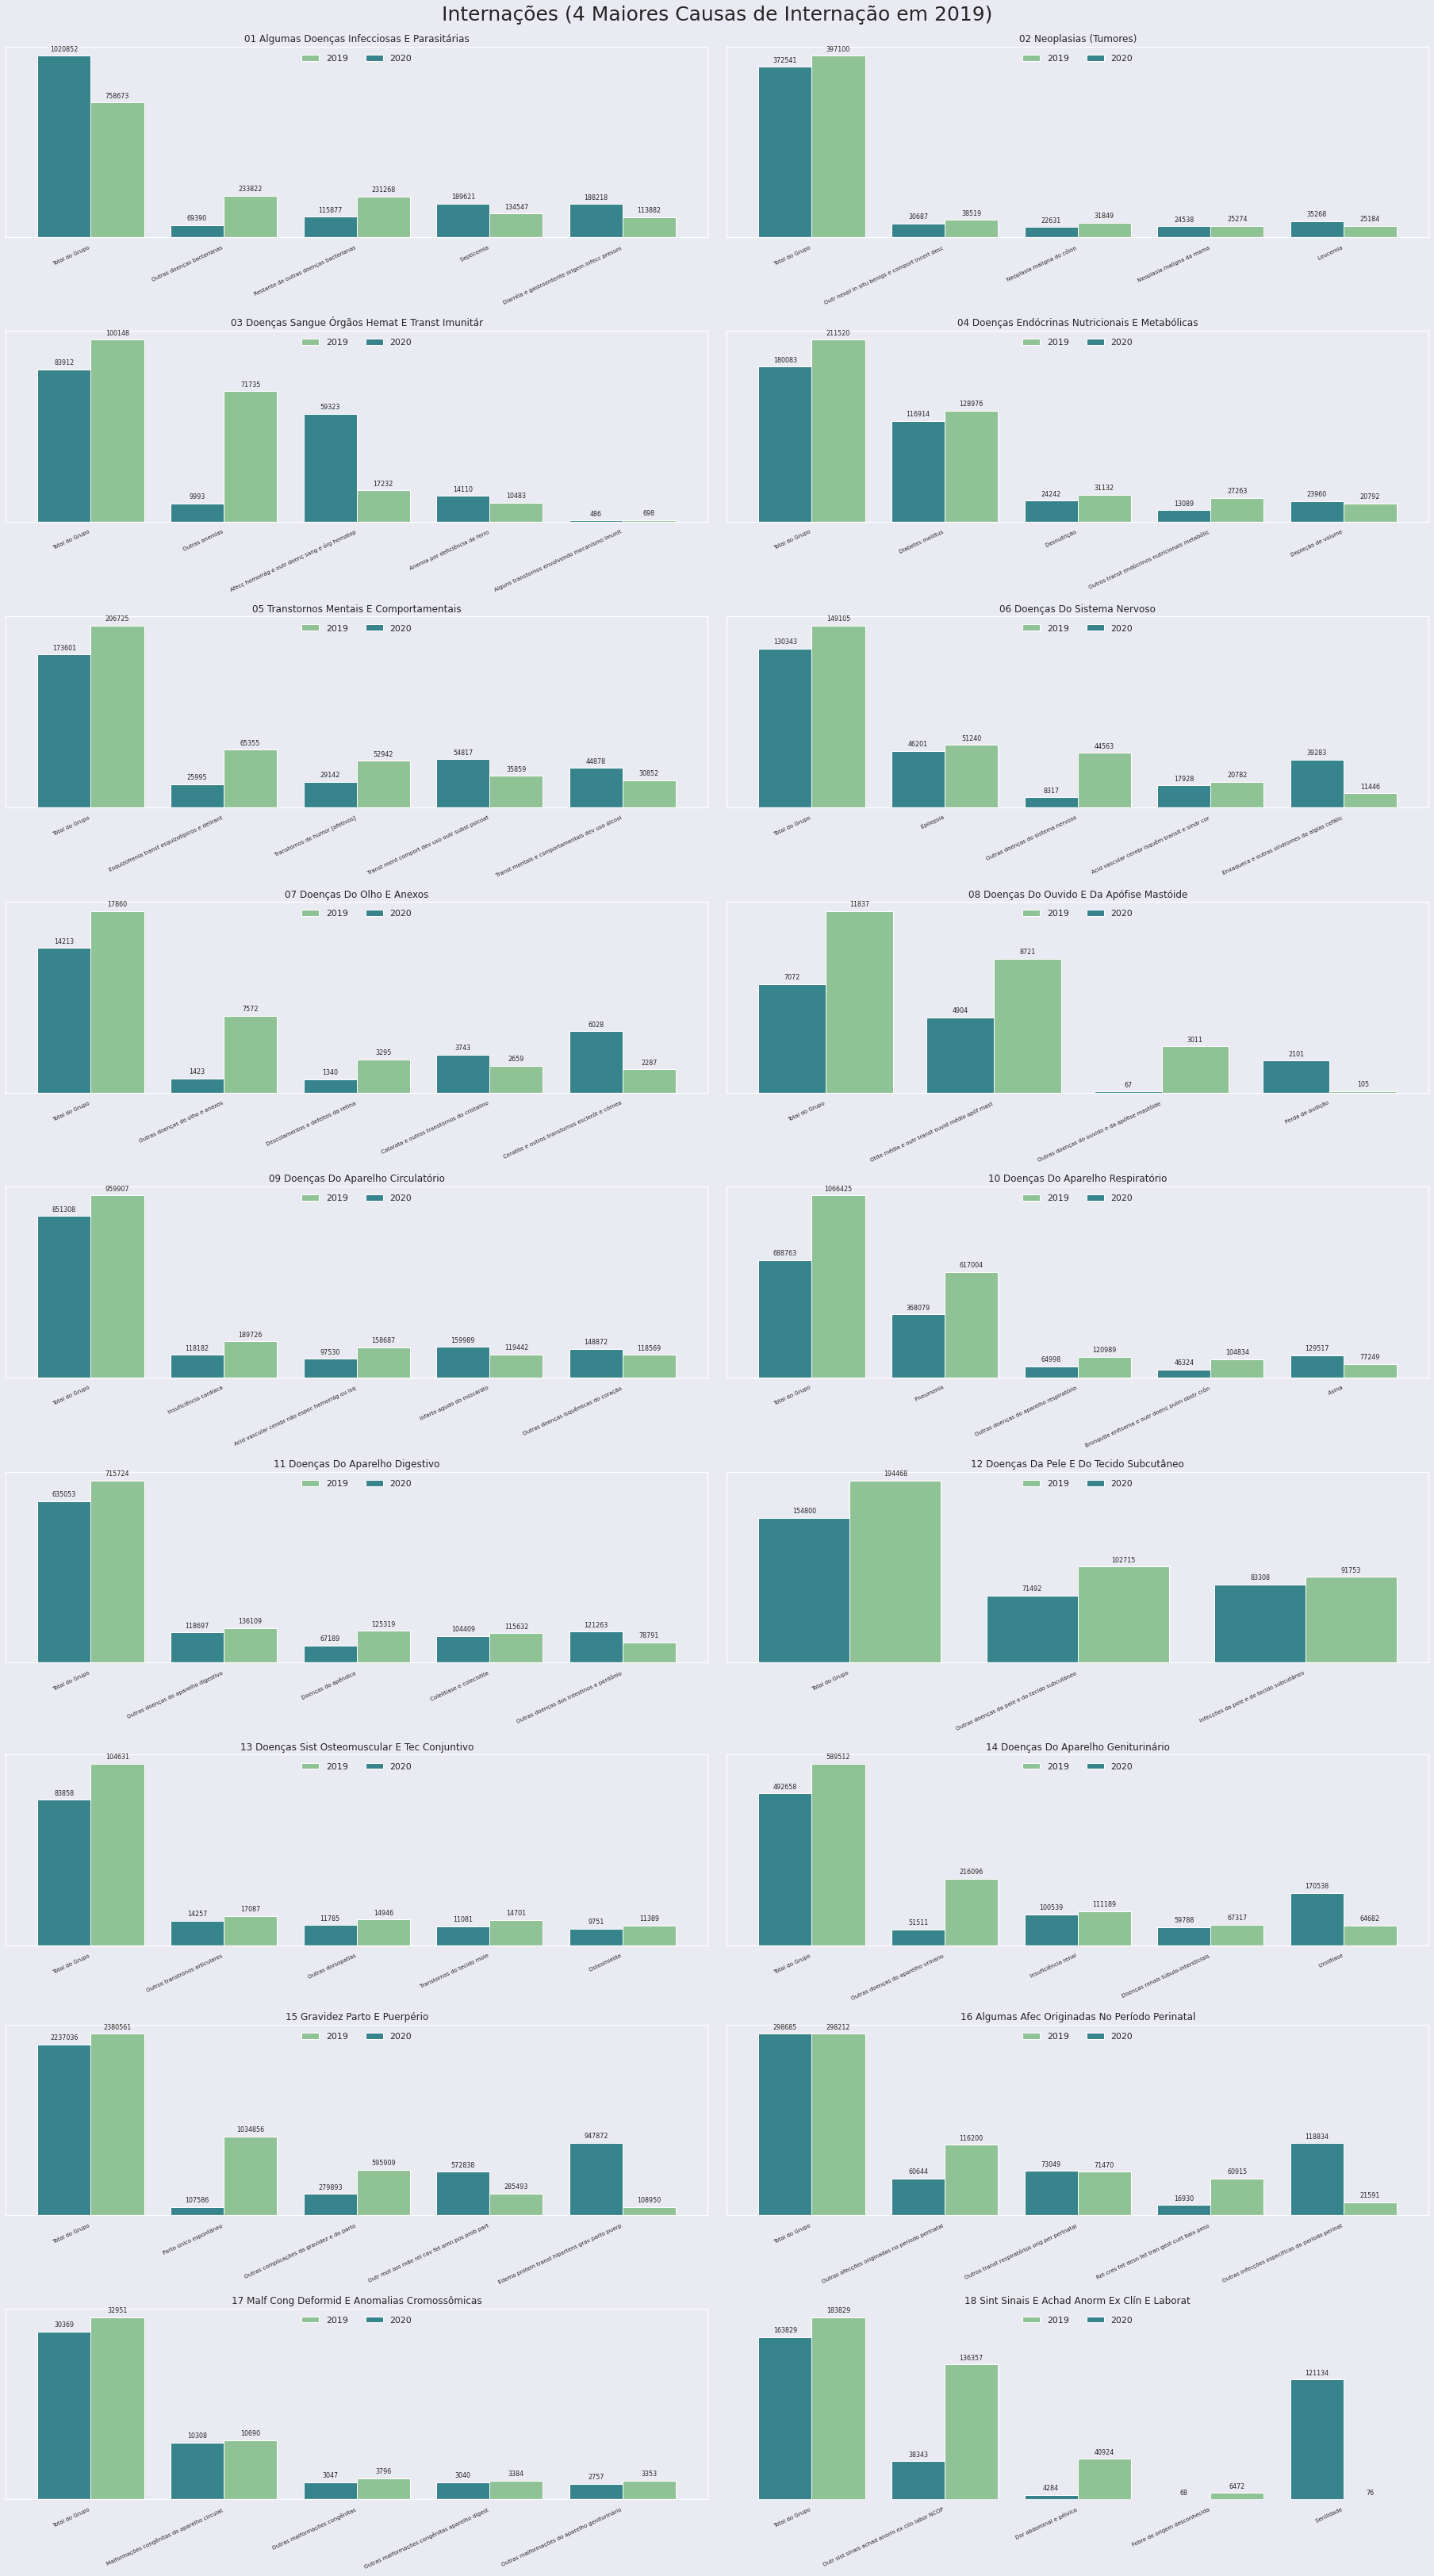

In [165]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(25,45))
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

width = 0.4
index = 0

for row in ax:
    for ax in row:
        rects1 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Internações'].values, 
                        width,align='edge', color = '#8FC294', label='2019')
        rects2 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2020.loc[grupos_cid[index]][df_2020.loc[grupos_cid[index]]["Lista Morb  CID-10"].isin(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values)]['Internações'].values, 
                        -width, align='edge', color = '#37848C', label='2020')

        for r1, r2 in zip(rects1.patches, rects2.patches):
            h1 = r1.get_height()
            h2 = r2.get_height()

            percent1 = h1
            percent2 = h2

            ax.annotate('{:.0f}'.format(percent1),
                            xy=(r1.get_x() + r1.get_width() / 2, h1),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            ax.annotate('{:.0f}'.format(percent2),
                            xy=(r2.get_x() + r2.get_width() / 2, h2),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            plt.box(False)  # disable the box around the plot
            ax.grid(False)  # disable the grid
            ax.set_yticks([])   # disable the y ticks
            ax.tick_params(axis='x', which='major', labelsize=7, labelrotation=25)
            
            for tick in ax.xaxis.get_majorticklabels():
                tick.set_horizontalalignment("right")
            
            ax.title.set_text(grupos_cid[index])
            ax.legend(frameon=False, loc='upper center', ncol=2)
        index+=1




#plt.legend(frameon=False, loc='upper center', ncol=2)
#plt.tight_layout()
plt.rcParams['figure.constrained_layout.use'] = True
fig.suptitle("Internações (4 Maiores Causas de Internação em 2019)", fontsize=25)
plt.savefig("internacoes-comparacao2019-2020.png", bbox_inches='tight', dpi=100)

plt.show();

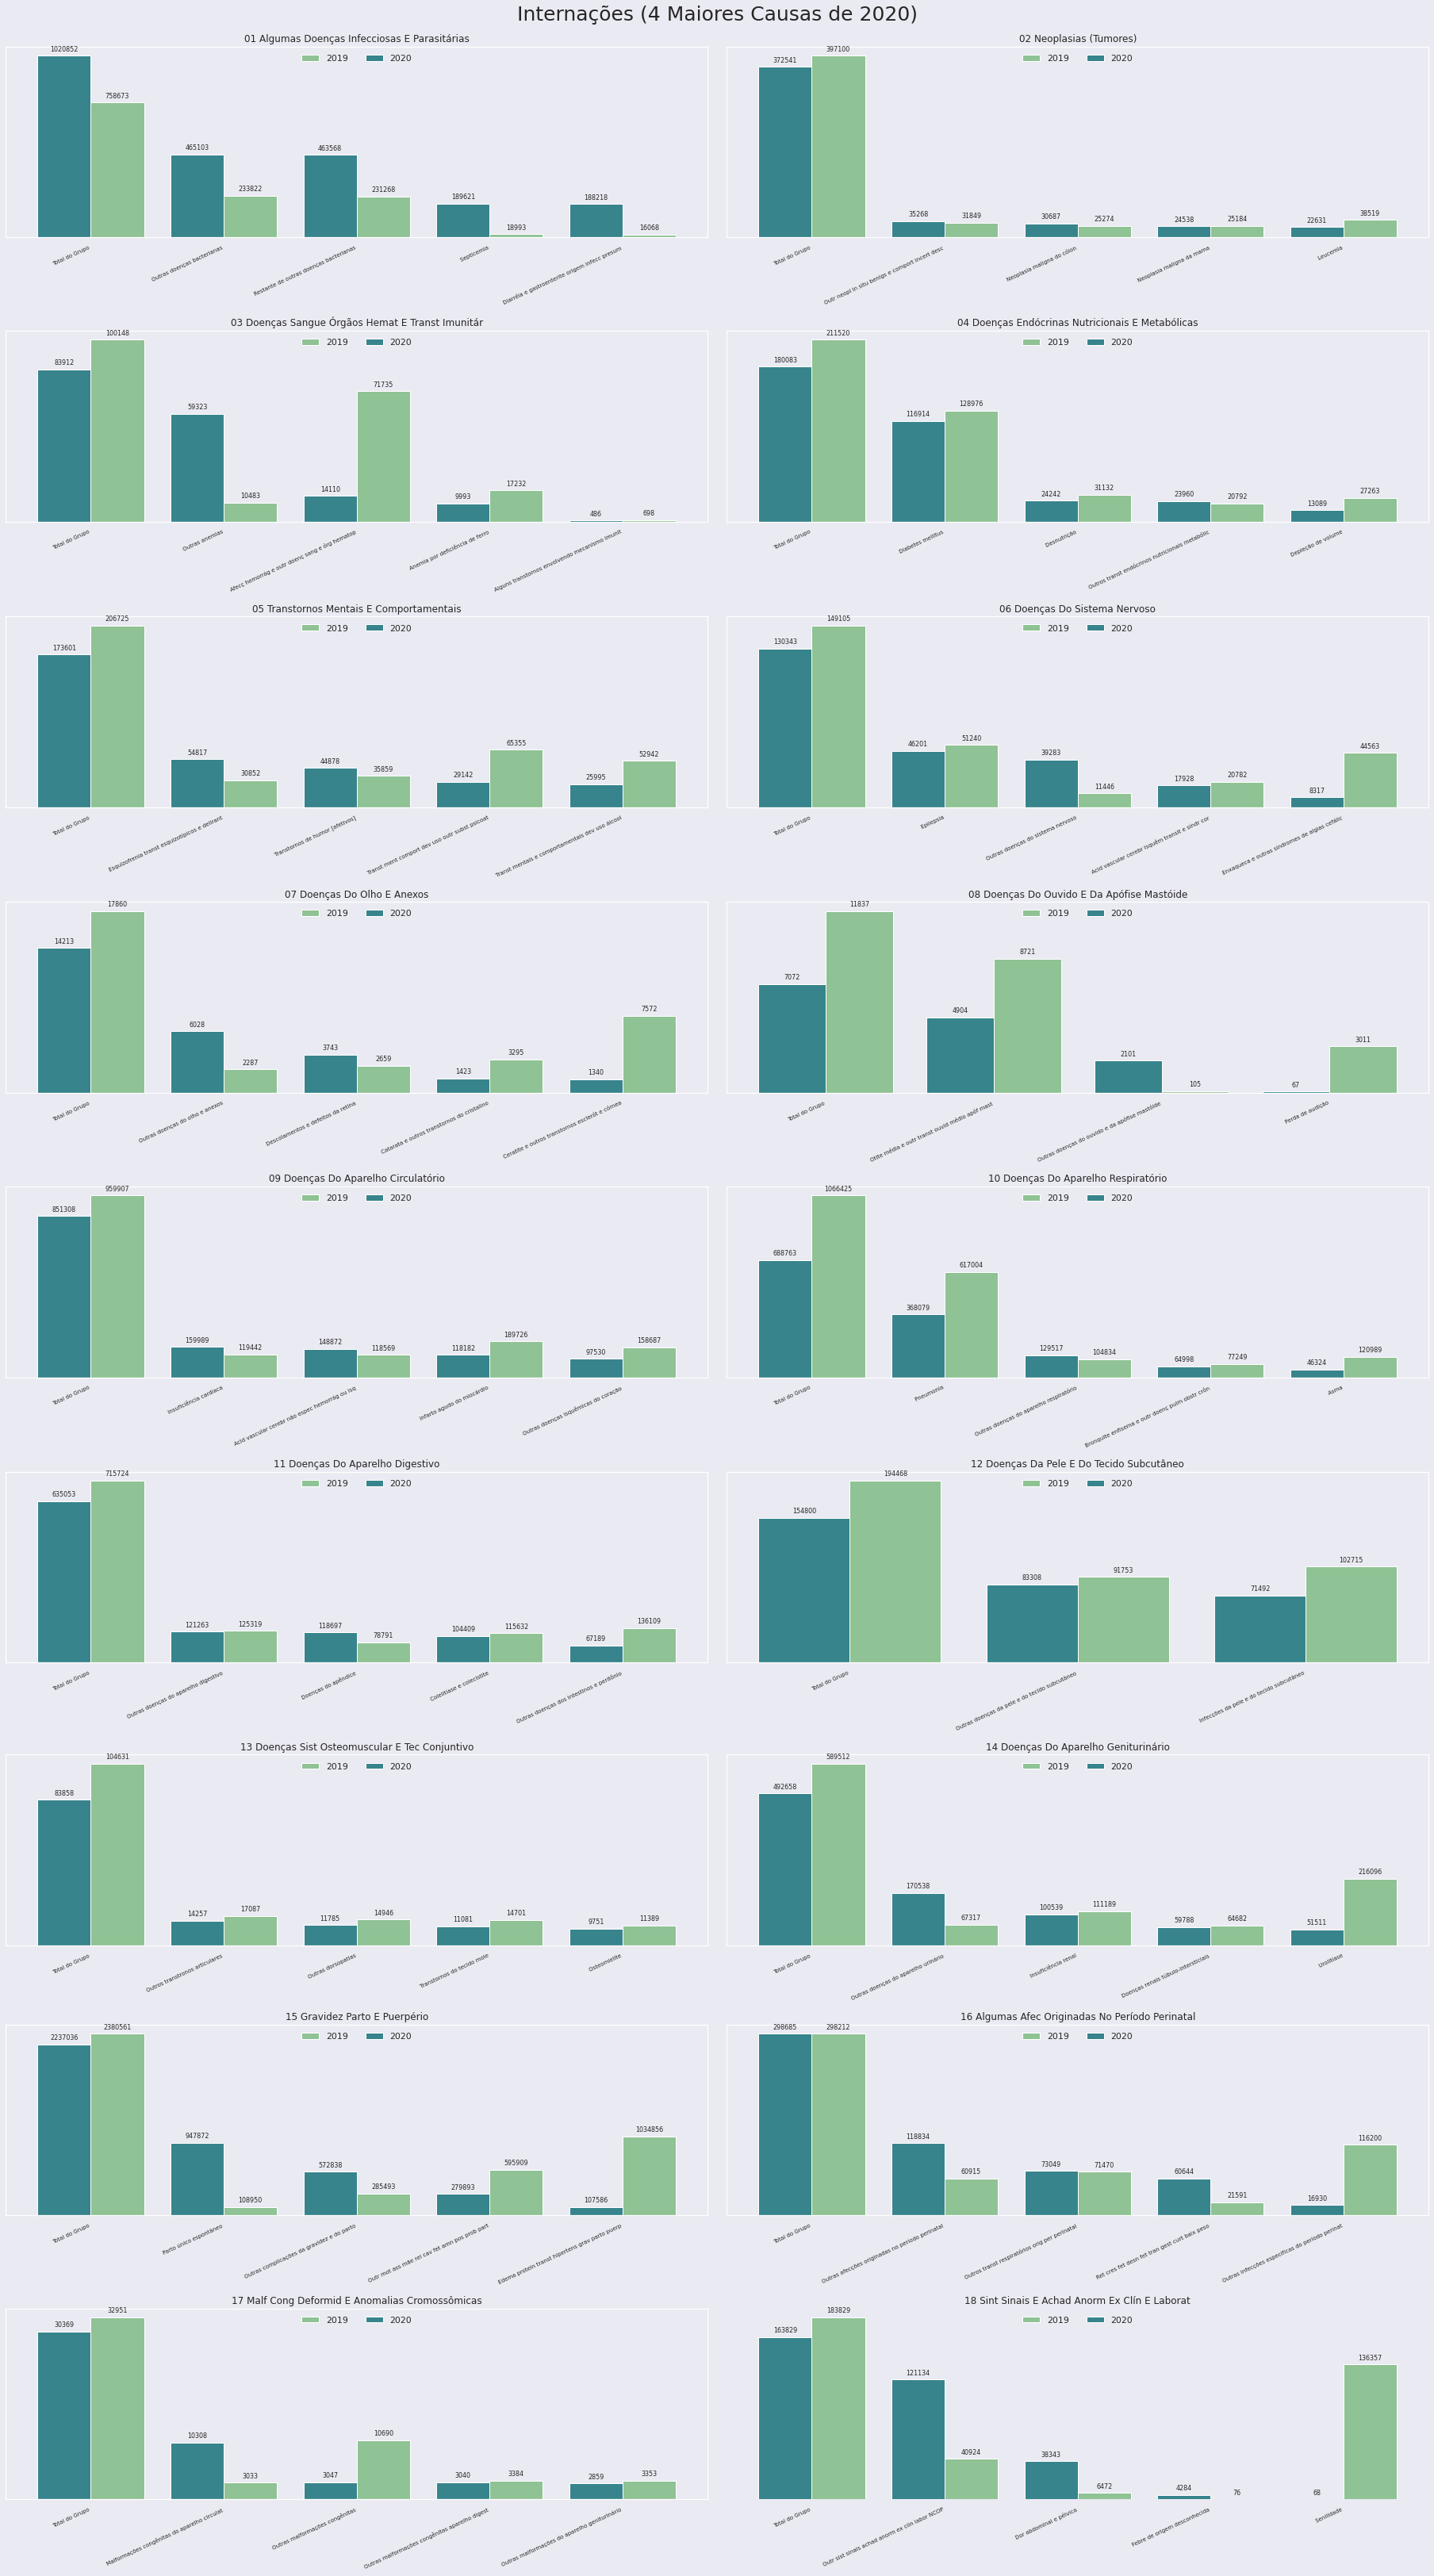

In [166]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(25,45))
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

width = 0.4
index = 0

for row in ax:
    for ax in row:
        rects1 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2019.loc[grupos_cid[index]][df_2019.loc[grupos_cid[index]]["Lista Morb  CID-10"].isin(df_2020.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values)]['Internações'].values, 
                        width,align='edge', color = '#8FC294', label='2019')
        rects2 = ax.bar(df_2019.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Lista Morb  CID-10'].values, 
                        df_2020.loc[grupos_cid[index]].nlargest(5, columns=['Internações'])['Internações'].values, 
                        -width, align='edge', color = '#37848C', label='2020')

        for r1, r2 in zip(rects1.patches, rects2.patches):
            h1 = r1.get_height()
            h2 = r2.get_height()

            percent1 = h1
            percent2 = h2

            ax.annotate('{:.0f}'.format(percent1),
                            xy=(r1.get_x() + r1.get_width() / 2, h1),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            ax.annotate('{:.0f}'.format(percent2),
                            xy=(r2.get_x() + r2.get_width() / 2, h2),
                            xytext=(0, 4),  # 3 points vertical offset
                            textcoords="offset points",
                            rotation=0,
                            fontsize = 8,
                            ha='center', va='bottom')
            plt.box(False)  # disable the box around the plot
            ax.grid(False)  # disable the grid
            ax.set_yticks([])   # disable the y ticks
            ax.tick_params(axis='x', which='major', labelsize=7, labelrotation=25)
            
            for tick in ax.xaxis.get_majorticklabels():
                tick.set_horizontalalignment("right")
            
            ax.title.set_text(grupos_cid[index])
            ax.legend(frameon=False, loc='upper center', ncol=2)
        index+=1




#plt.legend(frameon=False, loc='upper center', ncol=2)
#plt.tight_layout()
plt.rcParams['figure.constrained_layout.use'] = True
fig.suptitle("Internações (4 Maiores Causas de 2020)", fontsize=25)
plt.savefig("internacoes-comparacao2020-2019.png", bbox_inches='tight', dpi=100)

plt.show();